In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.nddata import Cutout2D
from astropy.visualization import simple_norm
from astropy.stats import sigma_clipped_stats

In [9]:
with open('data/SMSS 072242.59-390159.6/J/quad.reg') as f:
    for line in f:
        pass

        # print(line)
    # text = f.readline÷s()
line = line.split('(')[1].split(')')[0].split(',')
ra = float(line[0])
dec = float(line[1])
coords = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')
coords

(110.6774756, -39.0332252)

In [14]:
hdul = fits.open('data/SMSS 072242.59-390159.6/J/ADP.2019-10-22T15_31_42.369.fits.fz')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [37]:
rad = 30 * u.arcsec
wcs = WCS(hdul[1].header)
cutout = Cutout2D(hdul[1].data, coords, rad, wcs=wcs)
mean, median, std = sigma_clipped_stats(cutout.data, sigma=3.0)
print(np.array((mean, median, std)))  
data = cutout.data - mean
scale = wcs.pixel_scale_matrix[1, 1] * 3600
print(scale)

[1952.10803417 1952.            5.76353855]
-0.34130140178440427


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [42]:
from astropy.wcs.utils import proj_plane_pixel_scales

# Get pixel scales in degrees per pixel
pixel_scales = proj_plane_pixel_scales(wcs) * 3600.0
scale = np.mean(pixel_scales)
pixel_scales, scale

(array([0.34140367, 0.34130151]), np.float64(0.3413525909921117))

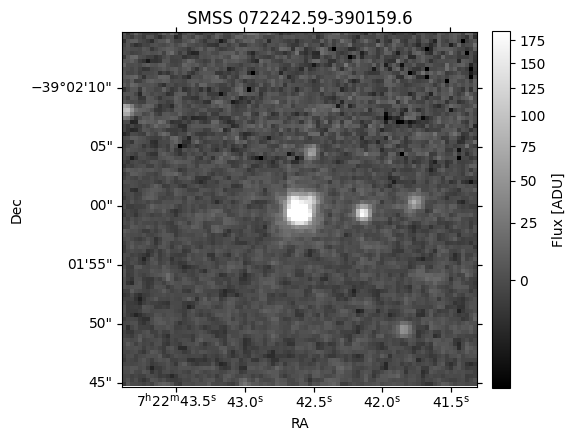

In [46]:
plt.figure(figsize=(5, 5))
plt.subplot(projection=cutout.wcs)
plt.imshow(data, origin='lower', cmap='gray', 
           norm=simple_norm(data, 'sqrt', percent=99.5))

# plt.grid(color='white', ls='--', lw=0.5, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('SMSS 072242.59-390159.6')
plt.colorbar(label='Flux [ADU]', fraction=0.046, pad=0.04)
plt.show()

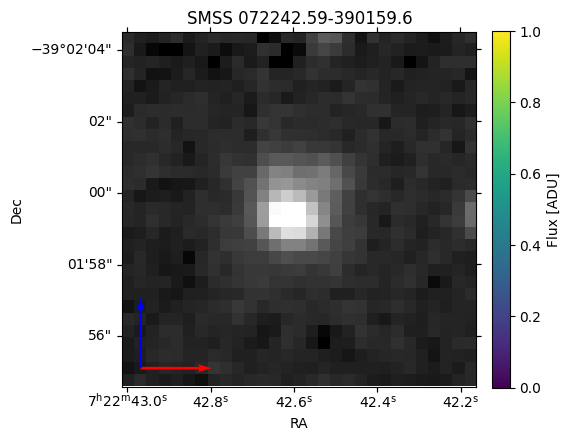

In [59]:
rad = 10 * u.arcsec
cutout = Cutout2D(hdul[1].data, coords, rad, wcs=wcs)
data = cutout.data - mean

plt.figure(figsize=(5, 5))
plt.subplot(projection=cutout.wcs)
plt.imshow(data, origin='lower', cmap='gray', 
           norm=simple_norm(data, 'sqrt', percent=99.))
plt.quiver(1, 1, 0.2, 0, scale=1, color='red', angles='xy')
plt.quiver(1, 1, 0, 0.2, scale=1, color='blue', angles='xy')

plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('SMSS 072242.59-390159.6')
plt.colorbar(label='Flux [ADU]', fraction=0.046, pad=0.04)
plt.show()